<a href="https://colab.research.google.com/github/dhayanesh/CNN-Transformer-EfficientNet-LeNet/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK 1:**
Demonstrate that a neural network to maximize the log-likelihood of the label has softmax output nodes and minimizes the criterion function of the negative log probability of the training data set. Train a LeNet-5 to classify CIFAR-10 images with and without image augmentation — plot training/validation loss/accuracy, provide the confusion matrix, and draw some correctly and incorrectly classified images. What best performance can you get? Useful links:

*   https://www.kaggle.com/code/curiousprogrammer/lenet-5-cnn-with-keras-99-48 
*   https://paperswithcode.com/sota/image-classification-on-cifar-10

Run with GPU Runtime!

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
cifar10  = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
X_train = tf.floor(tf.constant(x_train, dtype = tf.float32)/255)
Y_train = tf.constant(y_train, dtype = tf.int32)
X_test = tf.floor(tf.constant(x_test, dtype = tf.float32)/255)
Y_test = tf.constant(y_test, dtype = tf.int32)

In [ ]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
#Reference: https://www.kaggle.com/code/curiousprogrammer/lenet-5-cnn-with-keras-99-48

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5, 5), padding='valid', activation='relu'))
model.add(MaxPooling2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
modelAug = Sequential()
modelAug.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)))
modelAug.add(MaxPooling2D(strides=2))
modelAug.add(Conv2D(filters=48, kernel_size=(5, 5), padding='valid', activation='relu'))
modelAug.add(MaxPooling2D(strides=2))
modelAug.add(Flatten())
modelAug.add(Dense(256, activation='relu'))
modelAug.add(Dense(84, activation='relu'))
modelAug.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam())

In [ ]:
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), batch_size=128)

Epoch 1/50
391/391 [==============================] - 6s 9ms/step - loss: 2.8324 - accuracy: 0.3242 - val_loss: 1.6088 - val_accuracy: 0.4213
Epoch 2/50
391/391 [==============================] - 2s 6ms/step - loss: 1.4522 - accuracy: 0.4798 - val_loss: 1.3738 - val_accuracy: 0.5029
Epoch 3/50
391/391 [==============================] - 2s 6ms/step - loss: 1.2375 - accuracy: 0.5636 - val_loss: 1.2893 - val_accuracy: 0.5526
Epoch 4/50
391/391 [==============================] - 2s 6ms/step - loss: 1.0970 - accuracy: 0.6142 - val_loss: 1.2043 - val_accuracy: 0.5820
Epoch 5/50
391/391 [==============================] - 2s 6ms/step - loss: 0.9730 - accuracy: 0.6617 - val_loss: 1.1636 - val_accuracy: 0.6070
Epoch 6/50
391/391 [==============================] - 3s 7ms/step - loss: 0.8635 - accuracy: 0.6986 - val_loss: 1.1763 - val_accuracy: 0.6091
Epoch 7/50
391/391 [==============================] - 2s 6ms/step - loss: 0.7617 - accuracy: 0.7330 - val_loss: 1.1548 - val_accuracy: 0.6323
Epoch 

In [ ]:
datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

In [ ]:
datagen.fit(x_train)

In [ ]:
modelAug.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam())

In [ ]:
historyAug = modelAug.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=50, validation_data=(x_test, y_test), steps_per_epoch=x_train.shape[0] // 128)

Epoch 1/50
390/390 [==============================] - 31s 75ms/step - loss: 2.6020 - accuracy: 0.3047 - val_loss: 1.6698 - val_accuracy: 0.3866
Epoch 2/50
390/390 [==============================] - 27s 69ms/step - loss: 1.5905 - accuracy: 0.4212 - val_loss: 1.5305 - val_accuracy: 0.4448
Epoch 3/50
390/390 [==============================] - 26s 67ms/step - loss: 1.5084 - accuracy: 0.4572 - val_loss: 1.3749 - val_accuracy: 0.5019
Epoch 4/50
390/390 [==============================] - 27s 70ms/step - loss: 1.4527 - accuracy: 0.4775 - val_loss: 1.4214 - val_accuracy: 0.5009
Epoch 5/50
390/390 [==============================] - 26s 68ms/step - loss: 1.4028 - accuracy: 0.4989 - val_loss: 1.3377 - val_accuracy: 0.5310
Epoch 6/50
390/390 [==============================] - 27s 69ms/step - loss: 1.3577 - accuracy: 0.5165 - val_loss: 1.3853 - val_accuracy: 0.5159
Epoch 7/50
390/390 [==============================] - 26s 68ms/step - loss: 1.3060 - accuracy: 0.5366 - val_loss: 1.2351 - val_accuracy:

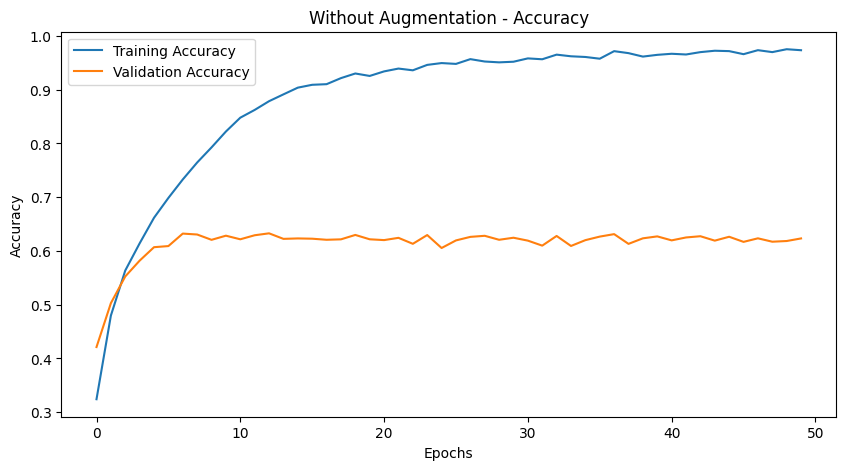

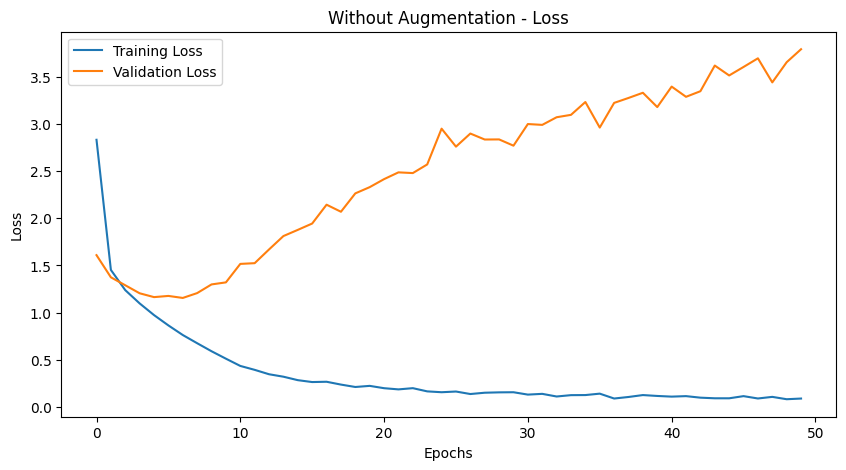

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Without Augmentation - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Without Augmentation - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

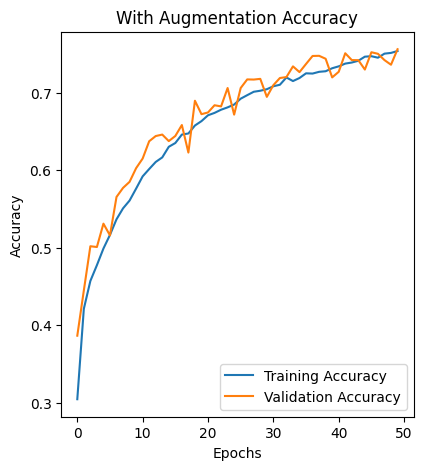

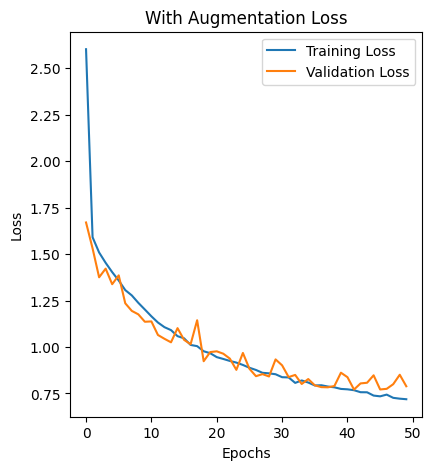

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(historyAug.history['accuracy'], label='Training Accuracy')
plt.plot(historyAug.history['val_accuracy'], label='Validation Accuracy')
plt.title('With Augmentation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

plt.figure(figsize=(10, 5))
plt.plot(historyAug.history['loss'], label='Training Loss')
plt.plot(historyAug.history['val_loss'], label='Validation Loss')
plt.title('With Augmentation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
y_pred = tf.argmax(model.predict(x_test), axis=-1)
y_true = tf.argmax(y_test, axis=-1)
conf_Mat = confusion_matrix(y_true, y_pred)
print("Confusion Matrix - Augmentation:\n", conf_Mat)

313/313 [==============================] - 1s 2ms/step
Confusion Matrix - Augmentation:
 [[720  14  63  13  23  11  13  12  96  35]
 [ 35 746   6   9  10  17  11   7  50 109]
 [ 79   9 531  52  97  77  63  57  22  13]
 [ 29  14  92 339  81 217  92  64  37  35]
 [ 47   9 111  61 525  68  56  94  16  13]
 [ 24   8  81 141  58 505  56  85  23  19]
 [ 15  10  66  67  50  56 685  20  14  17]
 [ 35   5  55  37  62  71  13 691  11  20]
 [ 91  28  21  15   7  13   7  10 767  41]
 [ 48  91  15  17   9  14  13  22  47 724]]


In [ ]:
y_pred_aug = tf.argmax(modelAug.predict(x_test), axis=-1)
y_true_aug = tf.argmax(y_test, axis=-1)
conf_MatAug = confusion_matrix(y_true_aug, y_pred_aug)
print("Confusion Matrix - Augmentation:\n", conf_MatAug)

313/313 [==============================] - 1s 2ms/step
Confusion Matrix - Augmentation:
 [[761  18  37  10  12   8  10  16  73  55]
 [  6 903   5   4   1   1   4   2   7  67]
 [ 68   8 665  26  54  57  67  34  12   9]
 [ 28  17  58 412  43 199 123  63  14  43]
 [ 22   2  60  22 690  42  83  69   5   5]
 [ 11  10  41  81  37 699  40  52   8  21]
 [  8  10  38  19  14  17 869  10   6   9]
 [ 18   8  22  12  16  53  15 840   4  12]
 [ 42  37  14  10   3   2   4   4 849  35]
 [ 22  69   4   5   1   3   2  11  13 870]]


313/313 [==============================] - 1s 2ms/step
Correctly classified images for model without augmentation:


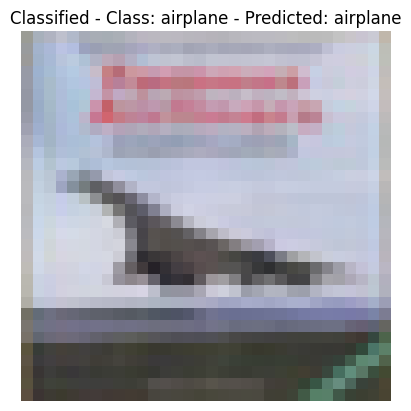

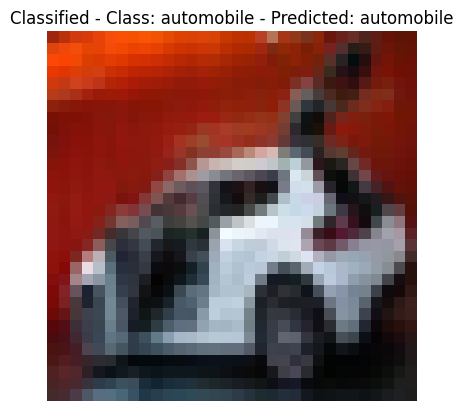

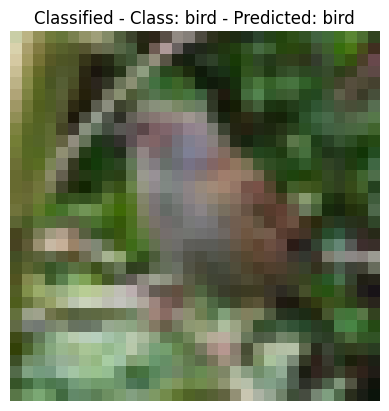

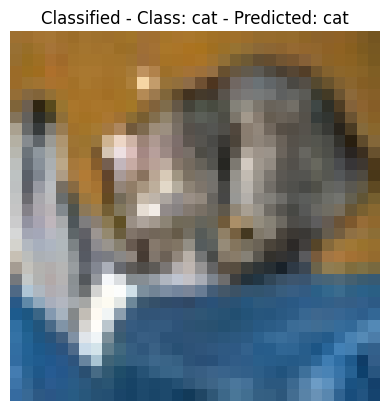

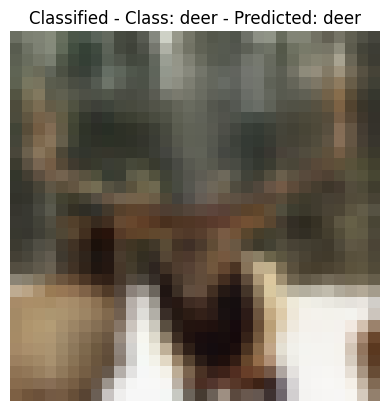

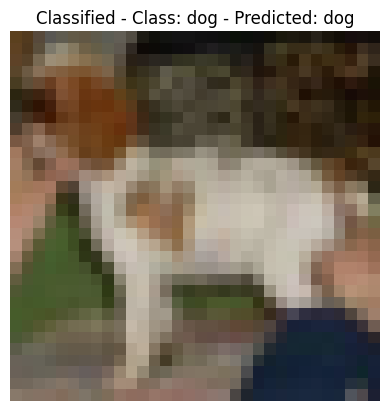

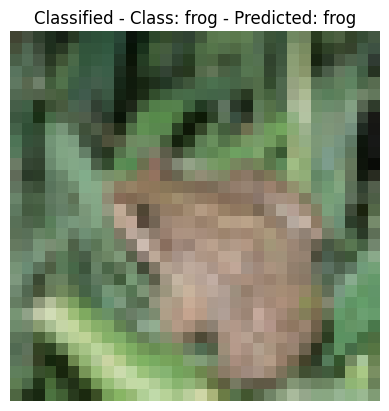

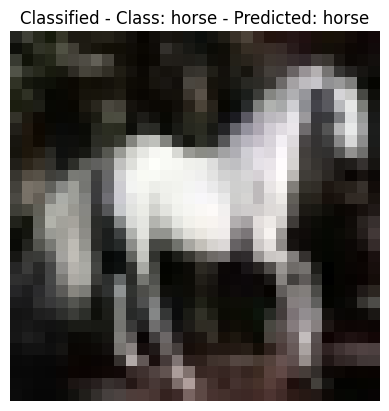

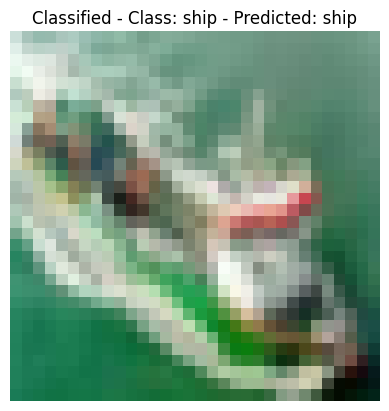

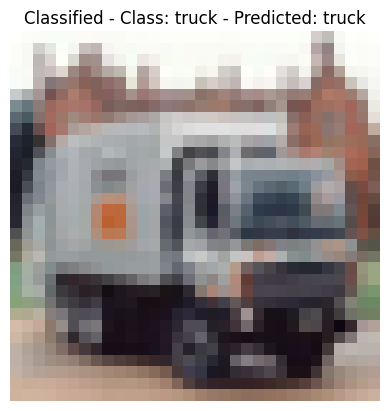

Incorrectly classified images for model without augmentation:


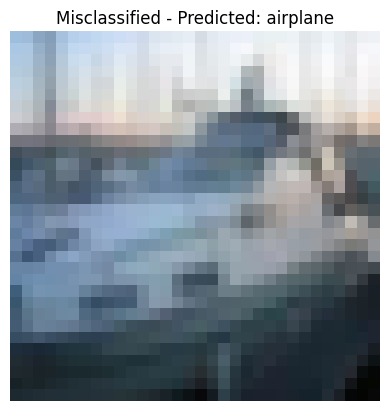

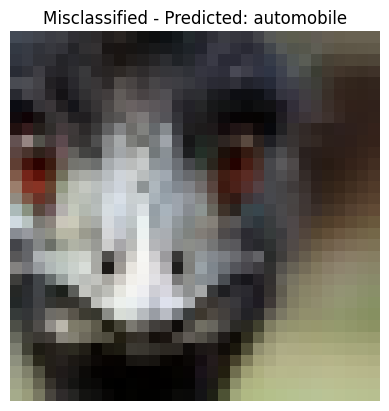

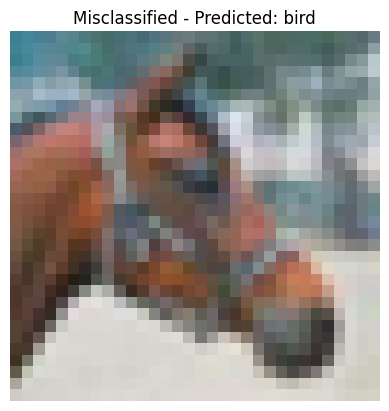

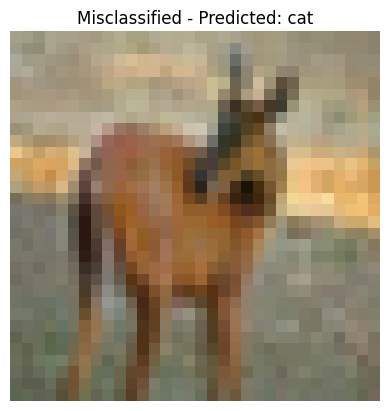

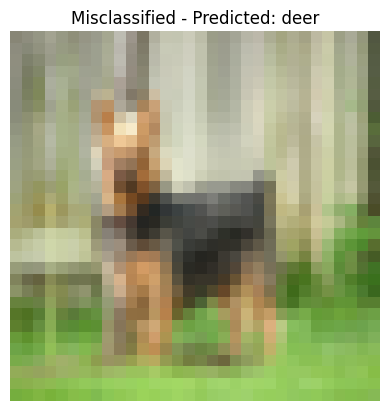

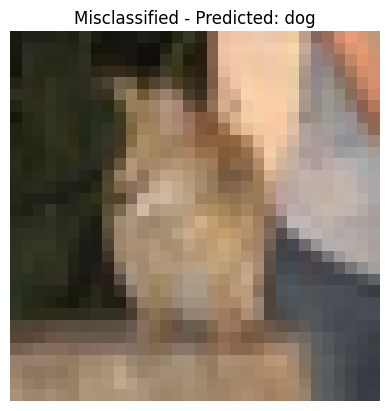

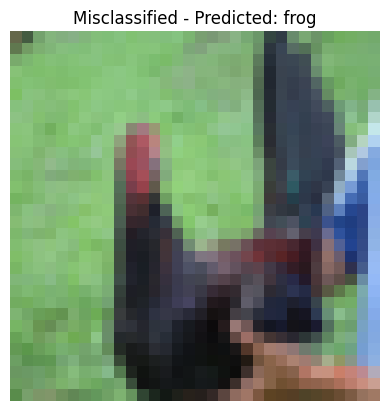

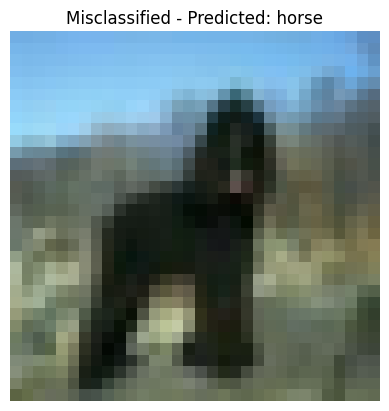

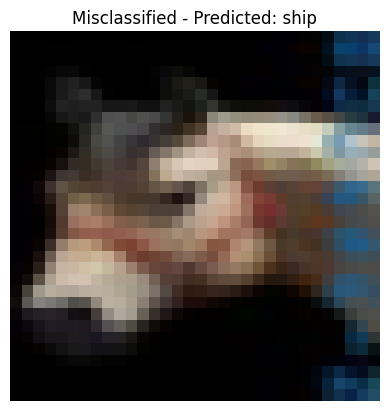

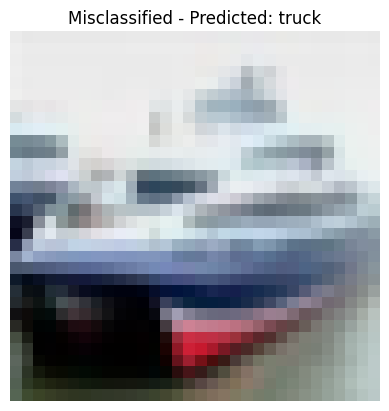

313/313 [==============================] - 1s 2ms/step
Correctly classified images for model with augmentation:


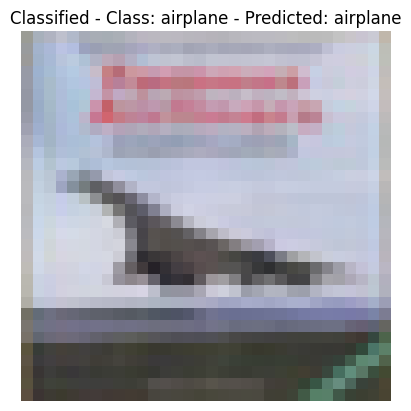

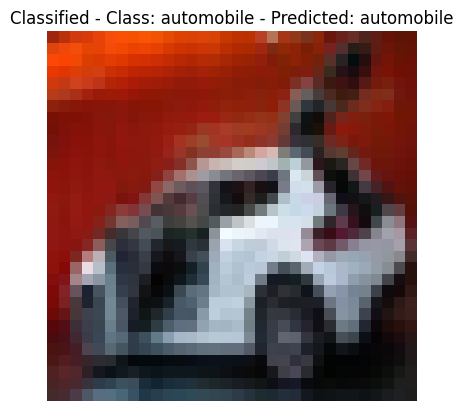

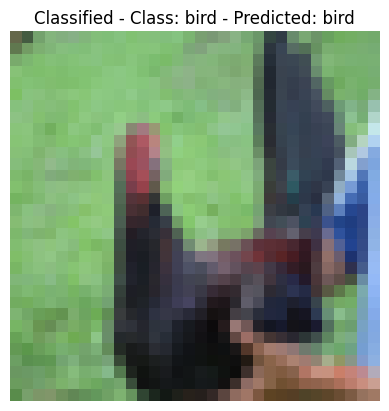

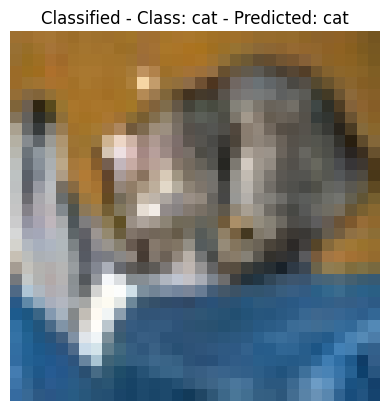

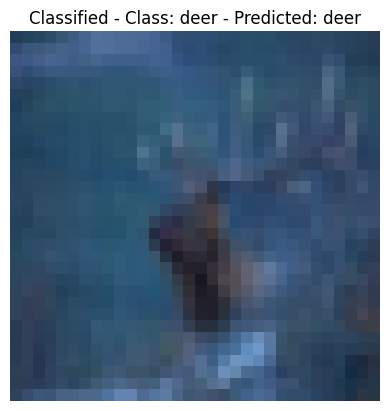

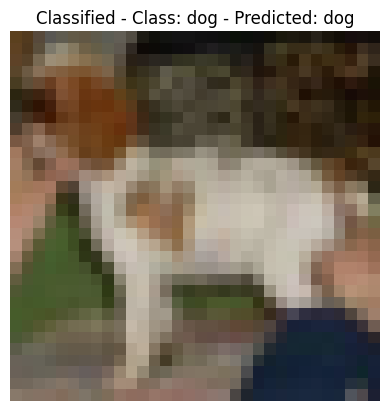

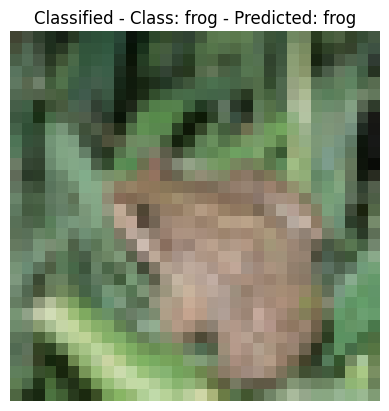

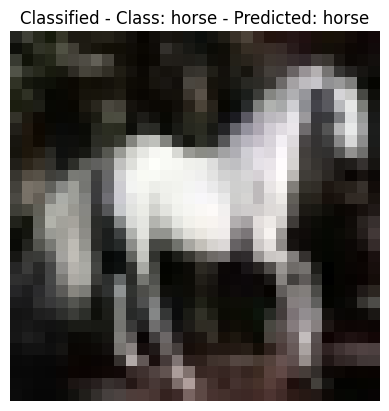

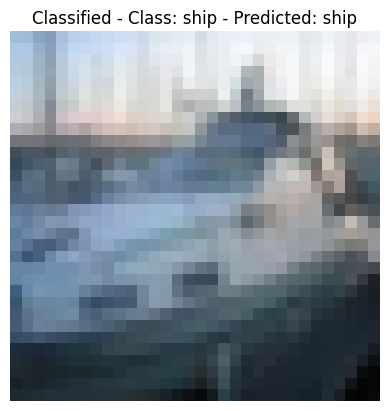

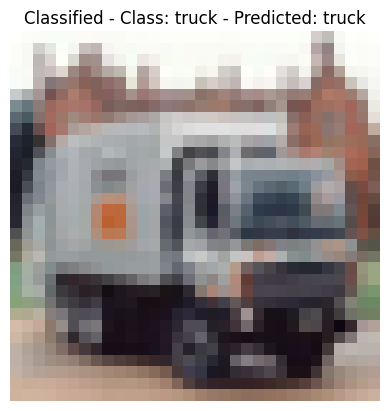

Incorrectly classified images for model with augmentation:


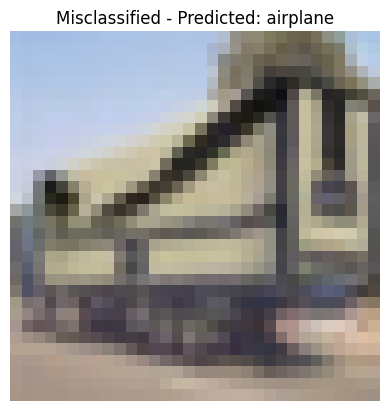

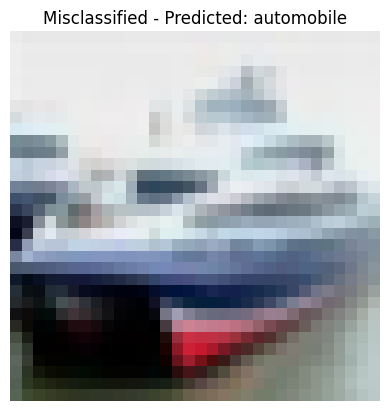

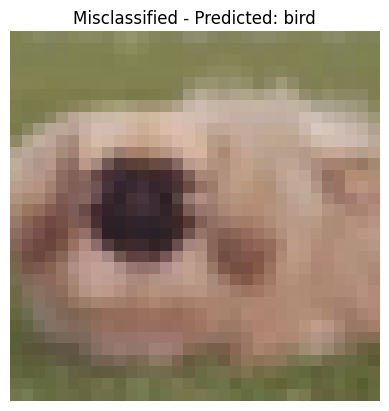

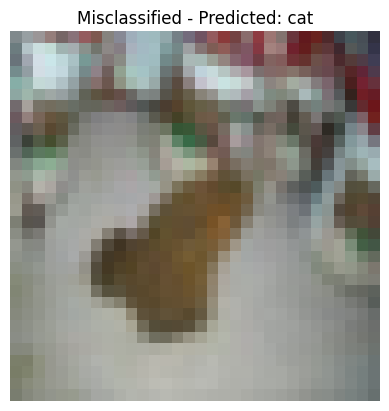

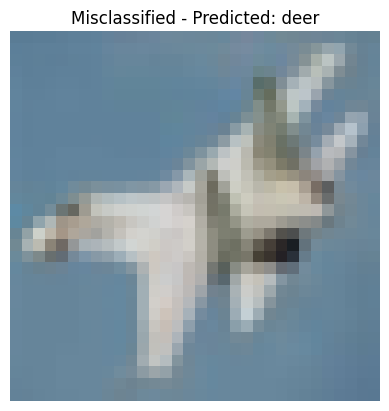

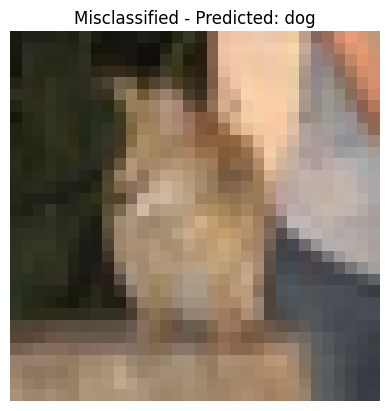

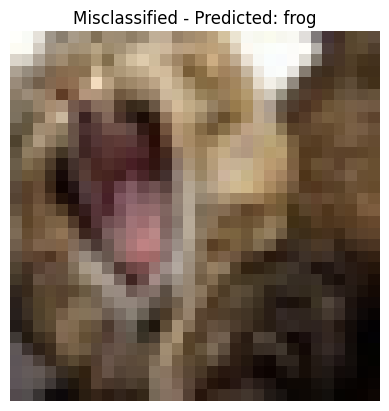

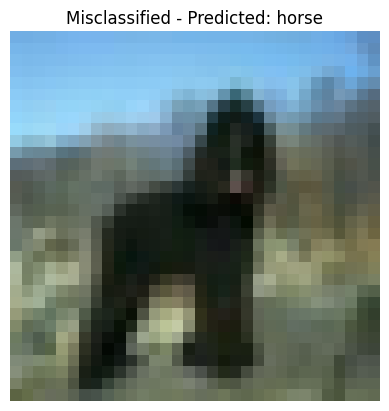

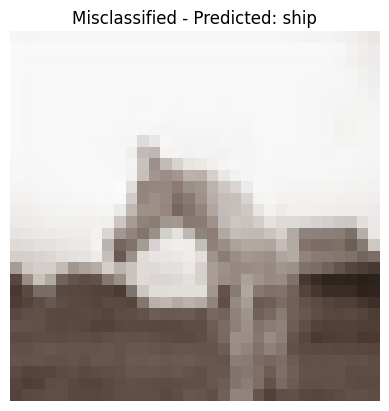

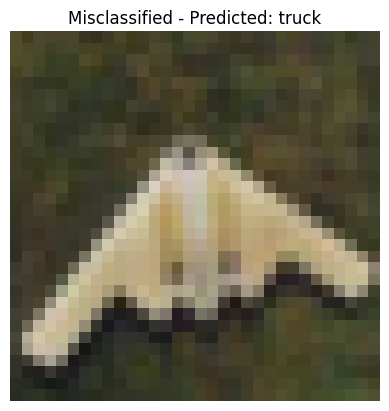

In [ ]:
class_names = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}
#image plotting code reused from previous assignment
def plotImages(model, x_test, y_test, modelType, correct=True):
    y_pred = tf.argmax(model.predict(x_test), axis=-1)
    y_true = tf.argmax(y_test, axis=-1)

    corr_imgs = {new_list: [] for new_list in range(0, 10)}
    incorr_imgs = {new_list: [] for new_list in range(0, 10)}

    for i in range(len(x_test)):
        predVal_int = y_pred[i].numpy()
        trueVal_int = y_true[i].numpy()

        if predVal_int == trueVal_int:
            if len(corr_imgs[trueVal_int]) < 1:
                corr_imgs[trueVal_int].append((x_test[i], predVal_int))
        else:
            if len(incorr_imgs[predVal_int]) < 1:
                incorr_imgs[predVal_int].append((x_test[i], predVal_int))

    print(f"Correctly classified images for {modelType}:")
    for i in range(10):
        for j in range(len(corr_imgs[i])):
            img, pred = corr_imgs[i][j]
            plt.imshow(tf.squeeze(img))
            plt.title(f"Classified - Class: {class_names[i]} - Predicted: {class_names[pred]}")
            plt.axis('off')
            plt.show()

    print(f"Incorrectly classified images for {modelType}:")
    for i in range(10):
        for j in range(len(incorr_imgs[i])):
            img, pred = incorr_imgs[i][j]
            plt.imshow(tf.squeeze(img))
            plt.title(f"Misclassified - Predicted: {class_names[pred]}")
            plt.axis('off')
            plt.show()

plotImages(model, x_test, y_test, "model without augmentation", correct=True)
plotImages(modelAug, x_test, y_test, "model with augmentation", correct=True)


**From the plotting, it is evident that the accuracy of the model improved with using image augmentation compared to without image augmentation.**

**Task 2:** Build an EfficientNet from scratch and train this network to classify CIFAR-100 images. Report your understanding of the several techniques involved in EfficientNet, such as depthwise convolution, stochastic depth, and attention mechanism. What performance can you get? 

Depth Convolution:

In [ ]:
import tensorflow as tf

Reference:
*   https://arxiv.org/abs/1905.11946
*   https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/
*   https://www.tensorflow.org/tutorials/images/data_augmentation
*   https://keras.io/api/layers/preprocessing_layers/image_preprocessing/

In [ ]:
def EfficientNet(input_shape=(32,32,3), num_classes=100, dropout_rate=0.2):
    inputs = tf.keras.layers.Input(shape=input_shape)
    
    x = tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal')(inputs)
    x = tf.keras.layers.experimental.preprocessing.RandomRotation(0.1)(x)
    x = tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2))(x)
    x = tf.keras.layers.experimental.preprocessing.RandomTranslation(height_factor=(-0.1, 0.1), width_factor=(-0.1, 0.1))(x)

    x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='same')(x)  # Changed input from 'inputs' to 'x' to include data augmentation
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('swish')(x)
    
    phi_values = [0, 0.5, 1, 1.5, 2]
    phi = phi_values[2]
    
    num_layers = [3, 4, 6, 3]
    filters = [16, 24, 40, 80, 112, 192, 320, 1280]
    in_channels = [32, 16, 24, 40, 80, 112, 192, 320]
    
    for i, num_layer in enumerate(num_layers):
        out_channels = [int(filters[j] * phi) for j in range(len(filters))]
        for j in range(num_layer):
            stride = 2 if j == 0 and i != 0 else 1
            
            x = tf.keras.layers.Conv2D(filters=out_channels[j], kernel_size=(3,3), strides=stride, padding='same')(x)
            x = tf.keras.layers.BatchNormalization()(x)
            x = tf.keras.layers.Activation('swish')(x)
            x = tf.keras.layers.Dropout(dropout_rate)(x)
            
        x = tf.keras.layers.Conv2D(filters=in_channels[i+1], kernel_size=(1,1), strides=1, padding='same')(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Activation('swish')(x)
        x = tf.keras.layers.Dropout(dropout_rate)(x)
        x = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2, padding='same')(x)
        
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(units=num_classes, activation='softmax')(x)
    
    model = tf.keras.models.Model(inputs=inputs, outputs=x, name='EfficientNet')
    
    return model


In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data()

train_images = tf.floor(tf.constant(train_images, dtype = tf.float32)/255)
train_labels = tf.constant(train_labels, dtype = tf.int32)
test_images = tf.floor(tf.constant(test_images, dtype = tf.float32)/255)
test_labels = tf.constant(test_labels, dtype = tf.int32)

In [ ]:
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=100)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=100)

In [ ]:
model = EfficientNet(input_shape=(32, 32, 3), num_classes=100, dropout_rate=0.2)

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, batch_size=32, epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 [==============================] - 53s 24ms/step - loss: 4.6201 - accuracy: 0.0128 - val_loss: 4.5776 - val_accuracy: 0.0152
Epoch 2/50
1563/1563 [==============================] - 41s 26ms/step - loss: 4.5671 - accuracy: 0.0158 - val_loss: 4.5833 - val_accuracy: 0.0108
Epoch 3/50
1563/1563 [==============================] - 39s 25ms/step - loss: 4.5432 - accuracy: 0.0183 - val_loss: 4.5722 - val_accuracy: 0.0146
Epoch 4/50
1563/1563 [==============================] - 36s 23ms/step - loss: 4.5341 - accuracy: 0.0188 - val_loss: 4.5282 - val_accuracy: 0.0196
Epoch 5/50
1563/1563 [==============================] - 39s 25ms/step - loss: 4.5228 - accuracy: 0.0205 - val_loss: 4.5021 - val_accuracy: 0.0225
Epoch 6/50
1563/1563 [==============================] - 37s 24ms/step - loss: 4.5082 - accuracy: 0.0217 - val_loss: 4.5177 - val_accuracy: 0.0206
Epoch 7/50
1563/1563 [==============================] - 37s 24ms/step - loss: 4.5040 - accuracy: 0.0221 - val_loss: 4.4790 -

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 4.4552 - accuracy: 0.0337
Test loss: 4.455202579498291
Test accuracy: 0.03370000049471855


Attention mechanism:

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, Reshape, Multiply, Add

Reference:


*   https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/
*   https://towardsdatascience.com/squeeze-and-excitation-networks-9ef5e71eacd7
*   https://towardsdatascience.com/attention-in-computer-vision-fd289a5bd7ad






In [ ]:
def SEBlock(input_tensor, reduction_ratio=16):
    num_channels = input_tensor.shape[-1]
    
    se_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
    se_tensor = tf.keras.layers.Reshape((1, 1, num_channels))(se_tensor)
    
    se_tensor = tf.keras.layers.Dense(num_channels // reduction_ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se_tensor)
    se_tensor = tf.keras.layers.Dense(num_channels, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se_tensor)
    
    output_tensor = tf.keras.layers.Multiply()([input_tensor, se_tensor])
    
    return output_tensor

In [ ]:
def AttentionModule(input_tensor, reduction_ratio=16):
    num_channels = input_tensor.shape[-1]
    
    spatial_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
    spatial_tensor = tf.keras.layers.Reshape((1, 1, num_channels))(spatial_tensor)
    spatial_tensor = tf.keras.layers.Conv2D(filters=num_channels // reduction_ratio, kernel_size=1, strides=1, padding='same', activation='relu', use_bias=False)(spatial_tensor)
    spatial_tensor = tf.keras.layers.Conv2D(filters=num_channels, kernel_size=1, strides=1, padding='same', activation='sigmoid', use_bias=False)(spatial_tensor)
    
    channel_tensor = SEBlock(input_tensor, reduction_ratio)
    
    combined_attention = tf.keras.layers.Add()([spatial_tensor, channel_tensor])

    output_tensor = tf.keras.layers.Multiply()([input_tensor, combined_attention])
    
    return output_tensor

In [ ]:
def EfficientNet(input_shape, num_classes, dropout_rate=0.2):
    inputs = Input(shape=input_shape)

    x = tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal')(inputs)
    x = tf.keras.layers.experimental.preprocessing.RandomRotation(0.1)(x)
    x = tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2))(x)
    x = tf.keras.layers.experimental.preprocessing.RandomTranslation(height_factor=(-0.1, 0.1), width_factor=(-0.1, 0.1))(x)

    x = inputs

    x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('swish')(x)

    num_blocks = [3, 4, 6, 3]
    num_filters = [16, 24, 40, 80]
    reduction_ratio = 16
    for i, (n, f) in enumerate(zip(num_blocks, num_filters)):
        if i > 0:
            x = MaxPooling2D(pool_size=3, strides=2, padding='same')(x)
        for j in range(n):
            if j == 0:
                x = AttentionModule(x, reduction_ratio)
            x = Conv2D(filters=f, kernel_size=3, strides=1, padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('swish')(x)
            if j == n - 1:
                x = AttentionModule(x, reduction_ratio)

    x = GlobalAveragePooling2D()(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs, name='EfficientNet_Attention')
    return model

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data()

train_images = tf.floor(tf.constant(train_images, dtype = tf.float32)/255)
train_labels = tf.constant(train_labels, dtype = tf.int32)
test_images = tf.floor(tf.constant(test_images, dtype = tf.float32)/255)
test_labels = tf.constant(test_labels, dtype = tf.int32)

In [ ]:
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=100)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=100)

In [ ]:
model = EfficientNet(input_shape=(32, 32, 3), num_classes=100, dropout_rate=0.2)

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, batch_size=32, epochs=25, validation_data=(test_images, test_labels))

Epoch 1/25
1563/1563 [==============================] - 75s 36ms/step - loss: 4.6181 - accuracy: 0.0107 - val_loss: 359420.8750 - val_accuracy: 0.0101
Epoch 2/25
1563/1563 [==============================] - 55s 36ms/step - loss: 4.5871 - accuracy: 0.0114 - val_loss: 743.3062 - val_accuracy: 0.0115
Epoch 3/25
1563/1563 [==============================] - 55s 35ms/step - loss: 4.5832 - accuracy: 0.0122 - val_loss: 4.6046 - val_accuracy: 0.0104
Epoch 4/25
1563/1563 [==============================] - 56s 36ms/step - loss: 4.5692 - accuracy: 0.0143 - val_loss: 8415912.0000 - val_accuracy: 0.0094
Epoch 5/25
1563/1563 [==============================] - 57s 36ms/step - loss: 4.5559 - accuracy: 0.0152 - val_loss: 4.7313 - val_accuracy: 0.0100
Epoch 6/25
1563/1563 [==============================] - 58s 37ms/step - loss: 4.5314 - accuracy: 0.0188 - val_loss: 4.6965 - val_accuracy: 0.0111
Epoch 7/25
1563/1563 [==============================] - 58s 37ms/step - loss: 4.5130 - accuracy: 0.0209 - val_l

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 5s 15ms/step - loss: 5.1501 - accuracy: 0.0267
Test loss: 5.150053024291992
Test accuracy: 0.02669999934732914


**Task 3:**
 Build a vision transformer from scratch and train this network to classify CIFAR-10 and CIFAR-100 images. Report your understanding of the several techniques involved. What performance do you get in comparison with the reported performances? Useful links: https://github.com/tensorflow/models/blob/master/official/vision/MODEL_GARDEN.md



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
#CIFAR-10 dataset
(x_train10, y_train10), (x_test10, y_test10) = tf.keras.datasets.cifar10.load_data()

#CIFAR-100 dataset
(x_train100, y_train100), (x_test100, y_test100) = tf.keras.datasets.cifar100.load_data()

In [ ]:
X_train10 = tf.floor(tf.constant(x_train10, dtype = tf.float32)/255)
Y_train10 = tf.constant(y_train10, dtype = tf.int32)
X_test10 = tf.floor(tf.constant(x_test10, dtype = tf.float32)/255)
Y_test10 = tf.constant(y_test10, dtype = tf.int32)

X_train100 = tf.floor(tf.constant(x_train100, dtype = tf.float32)/255)
Y_train100 = tf.constant(y_train100, dtype = tf.int32)
X_test100 = tf.floor(tf.constant(x_test100, dtype = tf.float32)/255)
Y_test100 = tf.constant(y_test100, dtype = tf.int32)

In [ ]:
Y_train10, Y_test10 = keras.utils.to_categorical(Y_train10), keras.utils.to_categorical(Y_test10)
Y_train100, Y_test100 = keras.utils.to_categorical(Y_train100), keras.utils.to_categorical(Y_test100)

In [ ]:
#Reference: https://keras.io/examples/vision/image_classification_with_vision_transformer/

def create_vit(num_classes, patch_size, num_layers, hidden_size, num_heads, mlp_size, input_shape=(32, 32, 3)):
    data_augmentation = keras.Sequential(
        [
            layers.experimental.preprocessing.RandomFlip("horizontal"),
            layers.experimental.preprocessing.RandomRotation(0.02),
            layers.experimental.preprocessing.RandomZoom(0.2),
        ]
    )
    
    inputs = keras.Input(shape=input_shape)
    augmented = data_augmentation(inputs)
    
    patch_height = patch_size[0]
    patch_width = patch_size[1]
    num_channels = augmented.shape[-1]
    x = layers.Reshape((-1, patch_height * patch_width * num_channels))(augmented)
    x = layers.Dense(hidden_size)(x)
    
    num_patches = (augmented.shape[1] // patch_height) * (augmented.shape[2] // patch_width)
    pos_emb = layers.Embedding(input_dim=num_patches, output_dim=hidden_size)(tf.range(num_patches))
    x = pos_emb + x
    
    for _ in range(num_layers):
        y = x  #save for residual connection
        x = layers.MultiHeadAttention(num_heads=num_heads, key_dim=hidden_size // num_heads, dropout=0.1)(x, x)
        x = layers.LayerNormalization(epsilon=1e-6)(x + y + pos_emb)  #add residual connection
        y = layers.Dense(mlp_size, activation="relu")(x)
        y = layers.Dense(hidden_size)(y)
        x = layers.LayerNormalization(epsilon=1e-6)(x + y)
        
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(0.5)(x)
    
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

vit10 = create_vit(num_classes=10, patch_size=(8, 8), num_layers=6, hidden_size=256, num_heads=8, mlp_size=512)

vit100 = create_vit(num_classes=100, patch_size=(8, 8), num_layers=6, hidden_size=256, num_heads=8, mlp_size=512)


In [ ]:
vit10.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])
history_vit10 = vit10.fit(X_train10, Y_train10, epochs=25, validation_data=(X_test10, Y_test10), batch_size=64)

vit100.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])
history_vit100 = vit100.fit(X_train100, Y_train100, epochs=25, validation_data=(X_test100, Y_test100), batch_size=64)

Epoch 1/3
782/782 [==============================] - 49s 37ms/step - loss: 2.3909 - accuracy: 0.1183 - val_loss: 2.2737 - val_accuracy: 0.1239
Epoch 2/3
782/782 [==============================] - 28s 36ms/step - loss: 2.2889 - accuracy: 0.1253 - val_loss: 2.2696 - val_accuracy: 0.1424
Epoch 3/3
782/782 [==============================] - 33s 42ms/step - loss: 2.2834 - accuracy: 0.1298 - val_loss: 2.2807 - val_accuracy: 0.1221
Epoch 1/3
782/782 [==============================] - 50s 37ms/step - loss: 4.7767 - accuracy: 0.0107 - val_loss: 4.6172 - val_accuracy: 0.0100
Epoch 2/3
782/782 [==============================] - 27s 34ms/step - loss: 4.6263 - accuracy: 0.0105 - val_loss: 4.6119 - val_accuracy: 0.0100
Epoch 3/3
782/782 [==============================] - 27s 34ms/step - loss: 4.6178 - accuracy: 0.0106 - val_loss: 4.6104 - val_accuracy: 0.0100


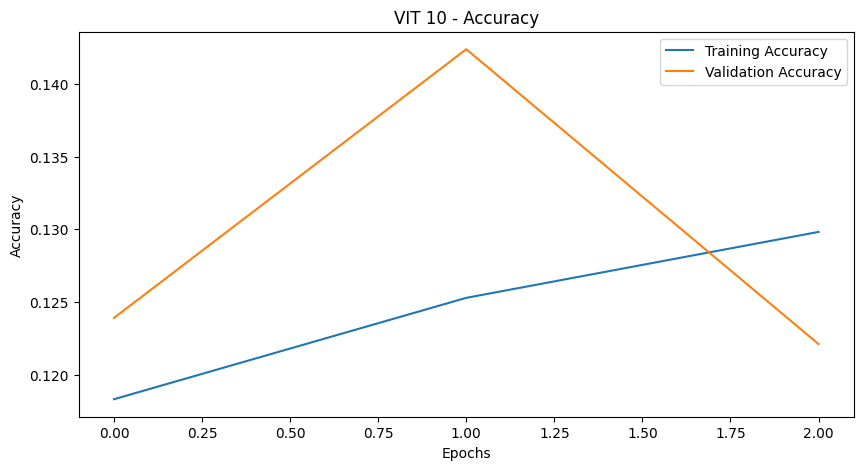

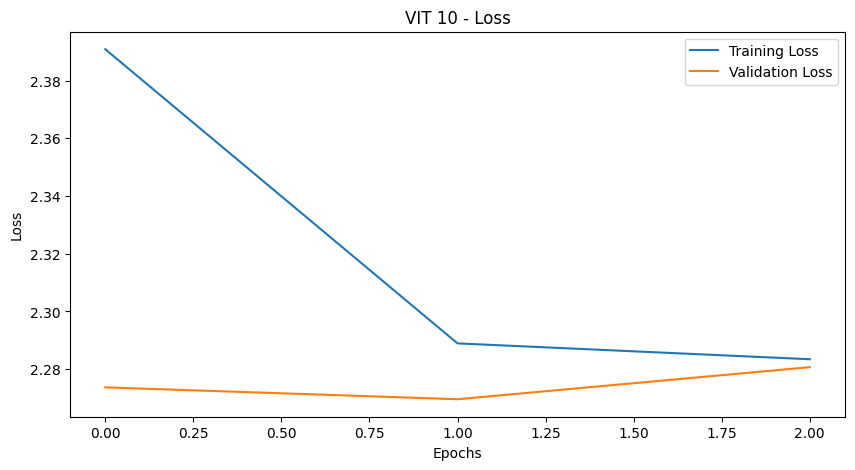

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history_vit10.history['accuracy'], label='Training Accuracy')
plt.plot(history_vit10.history['val_accuracy'], label='Validation Accuracy')
plt.title('VIT 10 - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history_vit10.history['loss'], label='Training Loss')
plt.plot(history_vit10.history['val_loss'], label='Validation Loss')
plt.title('VIT 10 - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

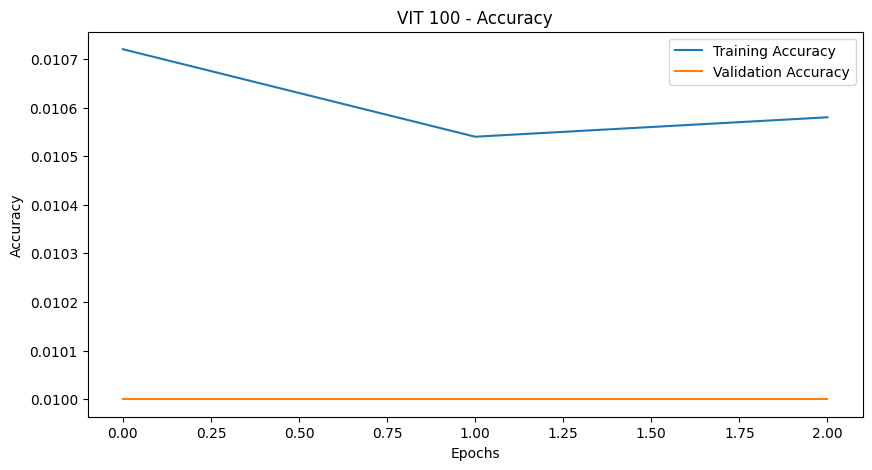

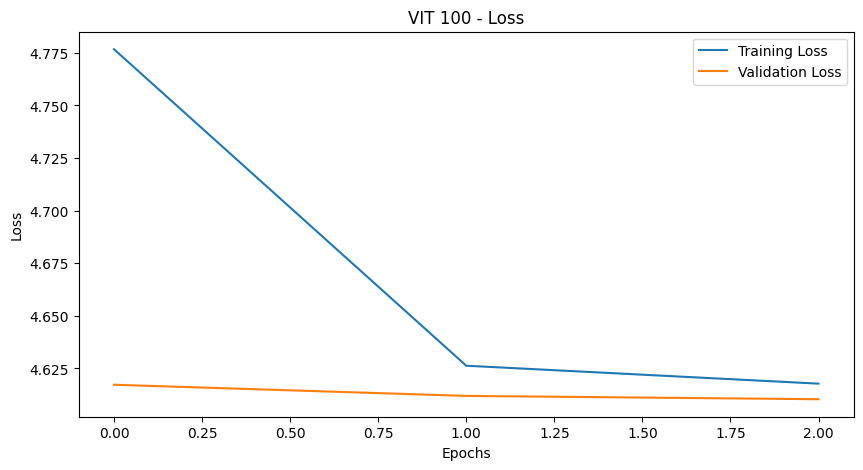

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history_vit100.history['accuracy'], label='Training Accuracy')
plt.plot(history_vit100.history['val_accuracy'], label='Validation Accuracy')
plt.title('VIT 100 - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history_vit100.history['loss'], label='Training Loss')
plt.plot(history_vit100.history['val_loss'], label='Validation Loss')
plt.title('VIT 100 - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()